In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.80:
        return 'A'
    elif perc >= 0.80 and perc < 0.95:
        return 'B'
    elif perc >= 0.95:
        return 'C'


In [3]:
sales = pd.read_csv('Data_Set_Basic.csv',parse_dates=True)


In [4]:
product = pd.read_csv('Product.csv')

In [13]:
sales.tail()

,invoiceno,code,quantity,year,invoicedate,unitprice,sellprice,custid,country,shipper,cost,totalcost,region,salesperson,margin,commodity
566304,545332,M,13,2017,2017-03-01,12.295000,159.835000,12352,Norway,Delivery Truck,0.000000,0.000000,CENTRAL,GAIL H,100,Studs
566305,2556446,22502,2429,2018,2018-10-07,188.185900,457103.551100,15098,United Kingdom,Delivery Truck,1.882625,4572.895026,SOUTH,GRACE J,9896,Washer
566306,2556444,22502,1110,2018,2018-09-02,91.605250,101681.827500,15098,United Kingdom,UPS ground 3rd day,1.882625,2089.713248,SOUTH,GRACE J,4766,Washer
566307,539958,DOT,324,2016,2016-12-23,13.047424,4227.365376,13758,United Kingdom,UPS ground 3rd day,1.813247,587.492093,NORTH,JOHN A,620,Studs
566308,576837,DOT,8,2017,2017-11-16,9.815780,78.526240,14237,United Kingdom,UPS ground 2nd day,1.813247,14.505978,SOUTH,GRACE J,441,Studs


In [14]:
product.tail()

,code,Commodity
3953,GIFT_0001_50,Studs
3954,M,Studs
3955,PADS,Studs
3956,POST,Studs
3957,S,Studs


In [7]:
product['StockCode'] = product['StockCode'].apply(lambda x: x.upper())


In [8]:
product.rename(columns={'StockCode':'code'},inplace=True)

In [9]:
sales = pd.merge(sales,product, on='code', how='left')

In [10]:
sales.rename(columns={'Commodity':'commodity'},inplace=True)

In [11]:
sales['invoicedate'] = pd.to_datetime(sales['invoicedate'])

In [12]:
sales.head()

,invoiceno,code,quantity,year,invoicedate,unitprice,sellprice,custid,country,shipper,cost,totalcost,region,salesperson,margin,commodity
0,568200,PADS,5,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs
1,568375,BANK CHARGES,5,2017,2017-09-26,0.999977,4.999883,13405,United Kingdom,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,100,Studs
2,561226,PADS,5,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs
3,2550193,PADS,7,2018,2018-06-08,0.999962,6.999731,13952,United Kingdom,UPS ground 2nd day,0.999953,6.999668,CENTRAL,PETER T,0,Studs
4,550193,PADS,5,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,0,Studs


In [16]:
sales['absmargin'] = sales['sellprice'] - sales['totalcost']
sales['month'] = sales['invoicedate'].apply(lambda x : x.month)

In [17]:
sales.head()

,invoiceno,code,quantity,year,invoicedate,unitprice,sellprice,custid,country,shipper,cost,totalcost,region,salesperson,margin,commodity,absmargin,month
0,568200,PADS,5,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,0.000113,9
1,568375,BANK CHARGES,5,2017,2017-09-26,0.999977,4.999883,13405,United Kingdom,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,100,Studs,4.999883,9
2,561226,PADS,5,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,-0.000335,7
3,2550193,PADS,7,2018,2018-06-08,0.999962,6.999731,13952,United Kingdom,UPS ground 2nd day,0.999953,6.999668,CENTRAL,PETER T,0,Studs,0.000063,6
4,550193,PADS,5,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,0,Studs,0.000177,4



### Using Abs-Margin as profit

In [18]:
grouped_abs_margin = sales.groupby(['commodity','code'], as_index = False).agg({'absmargin': lambda x: x.sum(),'quantity': lambda x:x.sum()})

grouped_abs_margin = grouped_abs_margin.sort_values(by=['absmargin'], ascending=False)

In [20]:
grouped_abs_margin

,commodity,code,absmargin,quantity
3284,Washer,22655,694907.417975,28665
3138,Washer,22502,568283.801060,38344
3285,Washer,22656,321985.687716,10728
3450,Washer,22827,285996.449000,11824
2753,Studs,85123A,214356.089263,539661
...,...,...,...,...
566,Bolt,21527,-15414.118902,77888
3128,Washer,22492,-17366.089187,318526
3457,Washer,22834,-20300.338432,148629
3320,Washer,22693,-27967.151083,337116


In [21]:

# grouped_abs_margin = grouped_abs_margin.sort_values(by=['absmargin'], ascending=False)
grouped_abs_margin['RunCumCost'] = grouped_abs_margin['absmargin'].cumsum()
# create the column of the total sum
grouped_abs_margin['TotSum'] = grouped_abs_margin['absmargin'].sum()
# create the column of the running percentage
grouped_abs_margin['RunPerc'] =  grouped_abs_margin['RunCumCost']/grouped_abs_margin['TotSum']
# grouped_abs_margin the column of the class
grouped_abs_margin['Class'] = grouped_abs_margin['RunPerc'].apply(ABC_segmentation)

In [27]:
grouped_abs_margin.tail()

,commodity,code,absmargin,quantity,RunCumCost,TotSum,RunPerc,Class
566,Bolt,21527,-15414.118902,77888,7.549653e+06,7.379390e+06,1.023073,C
3128,Washer,22492,-17366.089187,318526,7.532287e+06,7.379390e+06,1.020719,C
3457,Washer,22834,-20300.338432,148629,7.511987e+06,7.379390e+06,1.017969,C
3320,Washer,22693,-27967.151083,337116,7.484020e+06,7.379390e+06,1.014179,C
3774,Washer,23166,-104629.671176,685155,7.379390e+06,7.379390e+06,1.000000,C


In [23]:
sales_abs_margin = grouped_abs_margin

In [25]:
sales_abs_margin.Class.value_counts()

C    3506
B     162
A     137
Name: Class, dtype: int64

In [26]:
len(sales_abs_margin)

3805

In [24]:
sales_abs_margin.Class.value_counts()/(len(sales_abs_margin))

C    0.921419
B    0.042576
A    0.036005
Name: Class, dtype: float64

In [18]:
print ('Cost of Class A :', sales_abs_margin[sales_abs_margin.Class == 'A']['absmargin'].sum())
print ('Cost of Class B :', sales_abs_margin[sales_abs_margin.Class == 'B']['absmargin'].sum())
print ('Cost of Class C :', sales_abs_margin[sales_abs_margin.Class == 'C']['absmargin'].sum())

Cost of Class A : 5891361.60712
Cost of Class B : 1115998.38677
Cost of Class C : 372030.122026


In [19]:
print ('Percent of Cost of Class A :', sales_abs_margin[sales_abs_margin.Class == 'A']['absmargin'].sum()/sales_abs_margin['absmargin'].sum())
print ('Percent of Cost of Class B :', sales_abs_margin[sales_abs_margin.Class == 'B']['absmargin'].sum()/sales_abs_margin['absmargin'].sum())
print ('Percent of Cost of Class C :', sales_abs_margin[sales_abs_margin.Class == 'C']['absmargin'].sum()/sales_abs_margin['absmargin'].sum())

Percent of Cost of Class A : 0.798353456664
Percent of Cost of Class B : 0.151231791414
Percent of Cost of Class C : 0.0504147519215


In [20]:
sales_abs_margin.shape

(3805, 8)

In [21]:
a_class = sales_abs_margin[sales_abs_margin.Class == 'A']
b_class = sales_abs_margin[sales_abs_margin.Class == 'B']
c_class = sales_abs_margin[sales_abs_margin.Class == 'C']

In [22]:
a_class_ds = a_class.groupby('commodity').agg({'quantity': lambda x: x.sum(),'absmargin': lambda x : x.sum() })
((a_class_ds.quantity/(a_class_ds.quantity.sum()))*100).sort_values(ascending =False)

commodity
Washer    34.590350
Nut       24.009419
Bolt      22.589811
Studs     17.528327
Screw      1.282092
Name: quantity, dtype: float64

In [23]:
b_class_ds = b_class.groupby('commodity').agg({'quantity': lambda x: x.sum(),'absmargin': lambda x : x.sum() })
((b_class_ds.quantity/(b_class_ds.quantity.sum()))*100).sort_values(ascending =False)

commodity
Nut       46.615833
Washer    22.352471
Bolt      21.480613
Screw      5.544762
Studs      4.006322
Name: quantity, dtype: float64

In [24]:
c_class_ds = c_class.groupby('commodity').agg({'quantity': lambda x: x.sum(),'absmargin': lambda x : x.sum() })
((c_class_ds.quantity/(c_class_ds.quantity.sum()))*100).sort_values(ascending =False)

commodity
Washer    44.778688
Bolt      25.651247
Nut       17.895509
Screw      6.220919
Studs      5.453637
Name: quantity, dtype: float64

## Plotting

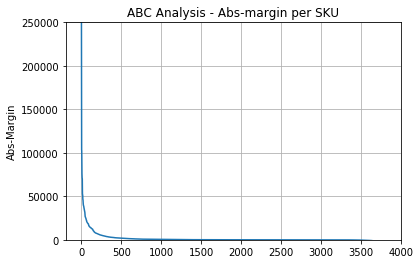

In [25]:
performance = sales_abs_margin['absmargin'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Abs-Margin')
plt.title('ABC Analysis - Abs-margin per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

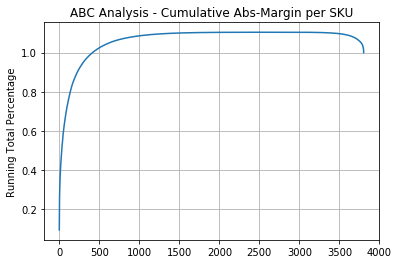

In [26]:
performance = sales_abs_margin['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Abs-Margin per SKU')
plt.grid(True)
plt.show()

## Using sellprice as profit

In [27]:
grouped_sellprice = sales.groupby(['code','commodity'], as_index = False).agg({'sellprice': lambda x: x.sum(),'quantity': lambda x:x.sum()})

grouped_sellprice = grouped_sellprice.sort_values(by=['sellprice'], ascending=False)

In [28]:
grouped_sellprice['RunCumCost'] = grouped_sellprice['sellprice'].cumsum()
# create the column of the total sum
grouped_sellprice['TotSum'] = grouped_sellprice['sellprice'].sum()
# create the column of the running percentage
grouped_sellprice['RunPerc'] =  grouped_sellprice['RunCumCost']/grouped_sellprice['TotSum']
# create the column of the class
grouped_sellprice['Class'] = grouped_sellprice['RunPerc'].apply(ABC_segmentation)

In [29]:
grouped_sellprice.head()

,code,commodity,sellprice,quantity,RunCumCost,TotSum,RunPerc,Class
1524,22655,Washer,1.428517e+06,28665,1.428517e+06,4.565355e+07,0.031290,A
2014,23166,Washer,7.777513e+05,685155,2.206268e+06,4.565355e+07,0.048326,A
1378,22502,Washer,6.404712e+05,38344,2.846739e+06,4.565355e+07,0.062355,A
1525,22656,Washer,5.499678e+05,10728,3.396707e+06,4.565355e+07,0.074402,A
1690,22827,Washer,5.333689e+05,11824,3.930076e+06,4.565355e+07,0.086085,A


In [30]:
sales_sub = grouped_sellprice.copy()

In [31]:
# sales_sub.to_csv('ABC_analysis_runn_perc.csv',index=False)

In [32]:
sales_sub.Class.value_counts()/(len(sales_sub))

C    0.612089
B    0.213929
A    0.173982
Name: Class, dtype: float64

In [33]:
print ('Cost of Class A :', sales_sub[sales_sub.Class == 'A']['sellprice'].sum())
print ('Cost of Class B :', sales_sub[sales_sub.Class == 'B']['sellprice'].sum())
print ('Cost of Class C :', sales_sub[sales_sub.Class == 'C']['sellprice'].sum())

Cost of Class A : 36516904.9559
Cost of Class B : 6850094.45173
Cost of Class C : 2286553.41034


In [34]:
print ('Percent of Cost of Class A :', sales_sub[sales_sub.Class == 'A']['sellprice'].sum()/sales_sub['sellprice'].sum())
print ('Percent of Cost of Class B :', sales_sub[sales_sub.Class == 'B']['sellprice'].sum()/sales_sub['sellprice'].sum())
print ('Percent of Cost of Class C :', sales_sub[sales_sub.Class == 'C']['sellprice'].sum()/sales_sub['sellprice'].sum())

Percent of Cost of Class A : 0.799869948819
Percent of Cost of Class B : 0.150045155939
Percent of Cost of Class C : 0.0500848952426


In [35]:
sales_sub.shape

(3805, 8)

In [36]:
a_class_1 = sales_sub[sales_sub.Class == 'A']
b_class_1= sales_sub[sales_sub.Class == 'B']
c_class_1 = sales_sub[sales_sub.Class == 'C']

In [37]:
a_class_ds_1 = a_class_1.groupby('commodity').agg({'quantity': lambda x: x.sum(),'sellprice': lambda x : x.sum() })
((a_class_ds_1.quantity/(a_class_ds_1.quantity.sum()))*100).sort_values(ascending =False)

commodity
Washer    47.870999
Bolt      26.168432
Nut       17.858344
Studs      6.141146
Screw      1.961080
Name: quantity, dtype: float64

In [38]:
b_class_ds_1 = b_class_1.groupby('commodity').agg({'quantity': lambda x: x.sum(),'sellprice': lambda x : x.sum() })
((b_class_ds_1.quantity/(b_class_ds_1.quantity.sum()))*100).sort_values(ascending =False)

commodity
Nut       34.763470
Washer    23.894830
Bolt      21.490827
Studs     10.685060
Screw      9.165814
Name: quantity, dtype: float64

In [39]:
c_class_ds_1 = c_class_1.groupby('commodity').agg({'quantity': lambda x: x.sum(),'sellprice': lambda x : x.sum() })
((c_class_ds_1.quantity/(c_class_ds_1.quantity.sum()))*100).sort_values(ascending =False)

commodity
Nut       31.800958
Screw     29.074870
Studs     17.457437
Bolt      16.249211
Washer     5.417525
Name: quantity, dtype: float64

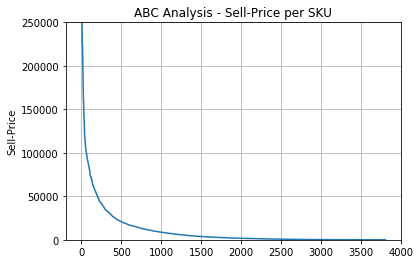

In [40]:
performance = sales_sub['sellprice'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Sell-Price')
plt.title('ABC Analysis - Sell-Price per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

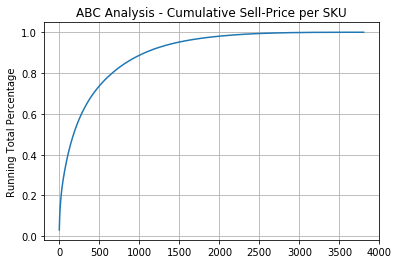

In [41]:
performance = sales_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Sell-Price per SKU')
plt.grid(True)
plt.show()

## FINAL WORKING ABC MODEL 

In [42]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 80:
        return 'A'
    elif perc >= 80 and perc < 95:
        return 'B'
    elif perc >= 95:
        return 'C'

In [43]:
sales['count'] = 1


check = sales.groupby(['code','commodity'], as_index = False).agg({'sellprice': lambda x: x.sum(),'quantity': lambda x:x.sum(),'count': lambda x: x.sum()})
check_sorted = check.sort_values(by=['sellprice'],ascending=False)

In [44]:
# # check_sorted

check_sorted['run_sum'] = check_sorted['sellprice'].cumsum()
check_sorted['cum_perc_sales'] = 100*check_sorted['run_sum']/check_sorted['sellprice'].sum()

check_sorted['run_count'] = check_sorted['count'].cumsum()
check_sorted['cum_perc_count'] = 100*check_sorted['run_count']/check_sorted['count'].sum()

check_sorted['class'] = check_sorted['cum_perc_sales'].apply(ABC_segmentation)

check_sorted['stock_count'] = 1
check_sorted['cumm_stock_count'] = check_sorted['stock_count'].cumsum()
check_sorted['stock_count_run_perc'] = 100*check_sorted['cumm_stock_count']/check_sorted['stock_count'].sum()

check_sorted.head()

,code,commodity,sellprice,quantity,count,run_sum,cum_perc_sales,run_count,cum_perc_count,class,stock_count,cumm_stock_count,stock_count_run_perc
1524,22655,Washer,1.428517e+06,28665,51,1.428517e+06,3.129038,51,0.009006,A,1,1,0.026281
2014,23166,Washer,7.777513e+05,685155,246,2.206268e+06,4.832632,297,0.052445,A,1,2,0.052562
1378,22502,Washer,6.404712e+05,38344,689,2.846739e+06,6.235526,986,0.174110,A,1,3,0.078844
1525,22656,Washer,5.499678e+05,10728,22,3.396707e+06,7.440181,1008,0.177995,A,1,4,0.105125
1690,22827,Washer,5.333689e+05,11824,30,3.930076e+06,8.608478,1038,0.183292,A,1,5,0.131406


In [45]:
check_sorted[check_sorted['cum_perc_sales']>=79]

,code,commodity,sellprice,quantity,count,run_sum,cum_perc_sales,run_count,cum_perc_count,class,stock_count,cumm_stock_count,stock_count_run_perc
1675,22812,Washer,16268.121350,10735,180,3.607339e+07,79.015524,278093,49.106230,A,1,634,16.662286
1853,22995,Washer,16240.624034,14678,292,3.608963e+07,79.051098,278385,49.157792,A,1,635,16.688568
310,21014,Bolt,16216.352471,15483,112,3.610585e+07,79.086618,278497,49.177569,A,1,636,16.714849
637,21528,Bolt,16170.910124,8184,133,3.612202e+07,79.122039,278630,49.201055,A,1,637,16.741130
1128,22224,Nut,16158.176894,23667,176,3.613818e+07,79.157432,278806,49.232133,A,1,638,16.767411
1974,23126,Washer,16153.206569,7780,313,3.615433e+07,79.192815,279119,49.287403,A,1,639,16.793693
1776,22917,Washer,16050.388197,14043,334,3.617038e+07,79.227971,279453,49.346382,A,1,640,16.819974
399,21163,Bolt,16045.686998,15168,137,3.618643e+07,79.263118,279590,49.370573,A,1,641,16.846255
3299,85114A,Studs,16042.277500,17530,87,3.620247e+07,79.298257,279677,49.385936,A,1,642,16.872536
2003,23155,Washer,16028.232104,13528,164,3.621850e+07,79.333366,279841,49.414895,A,1,643,16.898817


In [46]:
check_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 1524 to 873
Data columns (total 13 columns):
code                    3805 non-null object
commodity               3805 non-null object
sellprice               3805 non-null float64
quantity                3805 non-null int64
count                   3805 non-null int64
run_sum                 3805 non-null float64
cum_perc_sales          3805 non-null float64
run_count               3805 non-null int64
cum_perc_count          3805 non-null float64
class                   3805 non-null object
stock_count             3805 non-null int64
cumm_stock_count        3805 non-null int64
stock_count_run_perc    3805 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 416.2+ KB


In [47]:
check_sorted.to_csv('part_1_inventory_ABC_FOR_GRAPH_PLOTTING_nov_27.csv',index=False)

In [48]:
sales.head()

,invoiceno,code,quantity,year,invoicedate,unitprice,sellprice,custid,country,shipper,cost,totalcost,region,salesperson,margin,commodity,absmargin,month,count
0,568200,PADS,5,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,0.000113,9,1
1,568375,BANK CHARGES,5,2017,2017-09-26,0.999977,4.999883,13405,United Kingdom,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,100,Studs,4.999883,9,1
2,561226,PADS,5,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,-0.000335,7,1
3,2550193,PADS,7,2018,2018-06-08,0.999962,6.999731,13952,United Kingdom,UPS ground 2nd day,0.999953,6.999668,CENTRAL,PETER T,0,Studs,0.000063,6,1
4,550193,PADS,5,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,0,Studs,0.000177,4,1


In [49]:
check_sorted.head()

,code,commodity,sellprice,quantity,count,run_sum,cum_perc_sales,run_count,cum_perc_count,class,stock_count,cumm_stock_count,stock_count_run_perc
1524,22655,Washer,1.428517e+06,28665,51,1.428517e+06,3.129038,51,0.009006,A,1,1,0.026281
2014,23166,Washer,7.777513e+05,685155,246,2.206268e+06,4.832632,297,0.052445,A,1,2,0.052562
1378,22502,Washer,6.404712e+05,38344,689,2.846739e+06,6.235526,986,0.174110,A,1,3,0.078844
1525,22656,Washer,5.499678e+05,10728,22,3.396707e+06,7.440181,1008,0.177995,A,1,4,0.105125
1690,22827,Washer,5.333689e+05,11824,30,3.930076e+06,8.608478,1038,0.183292,A,1,5,0.131406


In [50]:
check_sorted_sub = check_sorted[['code','class']]

In [51]:
check_sorted_sub.head()

,code,class
1524,22655,A
2014,23166,A
1378,22502,A
1525,22656,A
1690,22827,A


In [52]:
final_merged_abc = pd.merge(sales,check_sorted_sub,on='code',how='left')

In [53]:
final_merged_abc.head()

,invoiceno,code,quantity,year,invoicedate,unitprice,sellprice,custid,country,shipper,cost,totalcost,region,salesperson,margin,commodity,absmargin,month,count,class
0,568200,PADS,5,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,0.000113,9,1,C
1,568375,BANK CHARGES,5,2017,2017-09-26,0.999977,4.999883,13405,United Kingdom,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,100,Studs,4.999883,9,1,C
2,561226,PADS,5,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,0,Studs,-0.000335,7,1,C
3,2550193,PADS,7,2018,2018-06-08,0.999962,6.999731,13952,United Kingdom,UPS ground 2nd day,0.999953,6.999668,CENTRAL,PETER T,0,Studs,0.000063,6,1,C
4,550193,PADS,5,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,0,Studs,0.000177,4,1,C


In [54]:
final_merged_abc.commodity.unique()

array(['Studs', 'Bolt', 'Screw', 'Nut', 'Washer'], dtype=object)

In [55]:
final_merged_abc.to_csv('part_1_sales_DATASET_WITH_ABC_nov_27.csv',index=False)